# Feature Creation for Text File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB

In [2]:
data_path = ('amazon_cells_labelled (1).txt')

In [3]:
amazon = pd.read_csv(data_path, sep= '\t', header=None)

In [4]:
amazon.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
amazon.columns = ['Comment', 'ranking']

In [7]:
from collections import Counter

In [8]:
res = []

for i in amazon[amazon.ranking == 1].Comment.str.split():
    res.extend(i)

In [9]:
Counter(res).most_common()

[('the', 192),
 ('and', 186),
 ('I', 146),
 ('is', 139),
 ('a', 100),
 ('to', 85),
 ('it', 71),
 ('this', 68),
 ('my', 66),
 ('for', 62),
 ('with', 62),
 ('very', 58),
 ('phone', 53),
 ('of', 49),
 ('The', 45),
 ('on', 43),
 ('good', 40),
 ('have', 37),
 ('It', 37),
 ('was', 35),
 ('in', 33),
 ('This', 32),
 ('great', 32),
 ('Great', 30),
 ('that', 29),
 ('works', 28),
 ('has', 23),
 ('headset', 22),
 ('are', 21),
 ('quality', 21),
 ('one', 21),
 ('so', 21),
 ('sound', 20),
 ('as', 20),
 ("I've", 19),
 ('recommend', 18),
 ('like', 18),
 ('than', 18),
 ('but', 18),
 ('you', 17),
 ('had', 17),
 ('from', 16),
 ('phone.', 16),
 ('love', 16),
 ('great.', 15),
 ('Works', 15),
 ('best', 15),
 ('well', 15),
 ('would', 15),
 ('any', 14),
 ('all', 14),
 ('-', 14),
 ('your', 14),
 ('Good', 13),
 ('use', 13),
 ('product', 13),
 ('not', 13),
 ('it.', 13),
 ('Excellent', 12),
 ('battery', 12),
 ('well.', 12),
 ('been', 12),
 ('happy', 12),
 ('really', 12),
 ('am', 12),
 ('can', 11),
 ('up', 11),
 ('

In [6]:
keywords = ['plug', 'charger', 'phone', 'purchase', 'price', 'quality', 'great', 'Great', 'great.', 'love', 'recommend', 'like', 'best', 'Good', 'Excellent', 'works']

for key in keywords:
    amazon[str(key)] = amazon.Comment.str.contains(' ' + str(key) + ' ', case=False)

The following keywords were selected as the new features due to their frequecy and likelihood to be a part of positive comments.

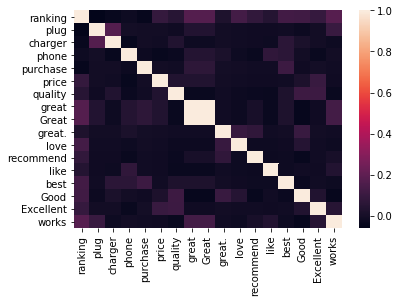

In [11]:
sns.heatmap(amazon.corr())

The heatmap above demonstrates most of the features are independent. Great and great are dependent on one another.

In [12]:
data = amazon[keywords]
target = amazon['ranking']

In [13]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

In [14]:
bnb.score(data, target)

0.64

Based on the score, the features have a 64% accuracy. Feature manipulation, adding more keywords, should increase accuracy.

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(target, y_pred)

array([[461,  39],
       [321, 179]], dtype=int64)

## Testing Model on New Text File

In [17]:
data_path2 = ('imdb_labelled.txt')

In [18]:
imdb = pd.read_csv(data_path2, sep= '\t', header=None)

In [19]:
imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [20]:
imdb.columns = ['Comment', 'ranking']

In [21]:
keywords = ['plug', 'charger', 'phone', 'purchase', 'price', 'quality', 'great', 'Great', 'great.', 'love', 'recommend', 'like', 'best', 'Good', 'Excellent', 'works']

for key in keywords:
    imdb[str(key)] = imdb.Comment.str.contains(' ' + str(key) + ' ', case=False)

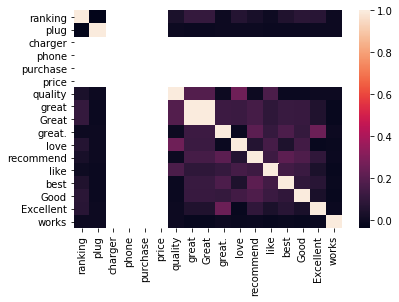

In [22]:
sns.heatmap(imdb.corr())

Based on the heatmap, charger, phone, purchase, and price are not within the imdb dataset. Thus using the same features as amazon does not comply with the imdb dataset.

In [23]:
data = imdb[keywords]
target = imdb['ranking']

In [24]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

In [25]:
bnb.score(data, target)

0.5521390374331551

Based on the score, the features have a 55% accuracy. Feature manipulation, adding more keywords, should increase accuracy.